[[    0.]
 [  500.]
 [ 1000.]
 [ 1500.]
 [ 2000.]
 [ 2500.]
 [ 3000.]
 [ 3500.]
 [ 4000.]
 [ 4500.]
 [ 5000.]
 [ 5500.]
 [ 6000.]
 [ 6500.]
 [ 7000.]
 [ 7500.]
 [ 8000.]
 [ 8500.]
 [ 9000.]
 [ 9500.]
 [10000.]
 [10500.]
 [11000.]
 [11500.]
 [12000.]
 [12500.]
 [13000.]
 [13500.]
 [14000.]
 [14500.]
 [15000.]
 [15500.]
 [16000.]
 [16500.]
 [17000.]
 [17500.]
 [18000.]
 [18500.]
 [19000.]
 [19500.]
 [20000.]
 [20500.]
 [21000.]
 [21500.]
 [22000.]
 [22500.]
 [23000.]
 [23500.]
 [24000.]
 [24500.]
 [25000.]
 [25500.]
 [26000.]
 [26500.]
 [27000.]
 [27500.]
 [28000.]
 [28500.]
 [29000.]
 [29500.]
 [30000.]
 [30500.]
 [31000.]
 [31500.]
 [32000.]
 [32500.]
 [33000.]
 [33500.]
 [34000.]
 [34500.]
 [35000.]
 [35500.]
 [36000.]
 [36500.]
 [37000.]
 [37500.]
 [38000.]
 [38500.]
 [39000.]
 [39500.]
 [40000.]
 [40500.]
 [41000.]
 [41500.]
 [42000.]
 [42500.]
 [43000.]
 [43500.]
 [44000.]
 [44500.]
 [45000.]
 [45500.]
 [46000.]
 [46500.]
 [47000.]
 [47500.]
 [48000.]
 [48500.]
 [49000.]
 [49500.]


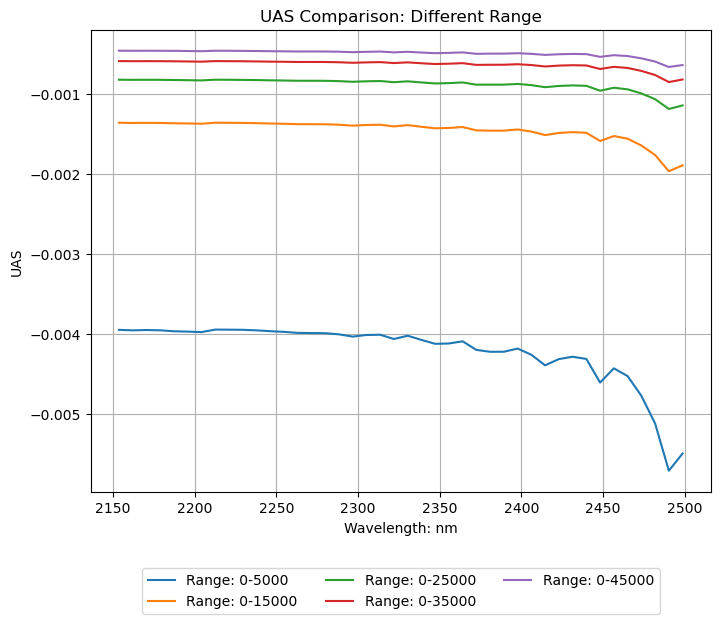

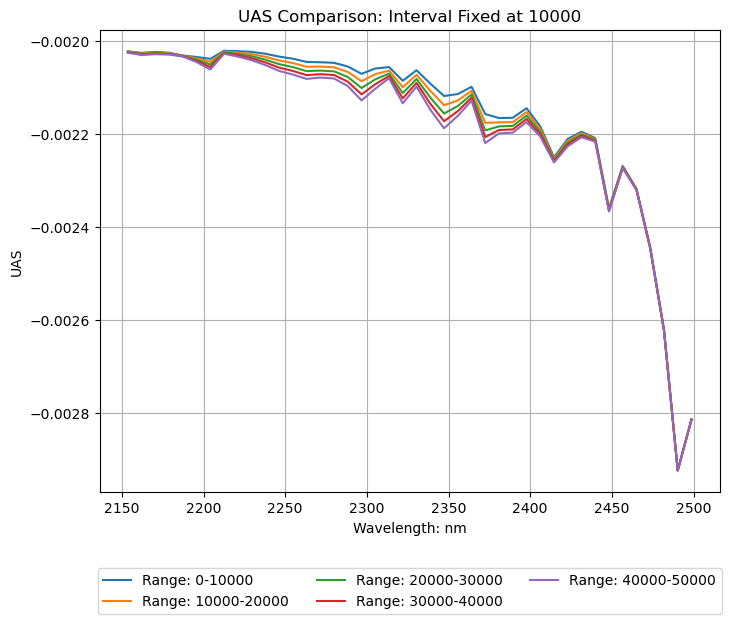

[[   0.]
 [ 500.]
 [1000.]
 [1500.]
 [2000.]
 [2500.]]
(6, 1)
[[   0.]
 [ 500.]
 [1000.]
 [1500.]
 [2000.]
 [2500.]]
(6, 1)
[[   0.]
 [ 500.]
 [1000.]
 [1500.]
 [2000.]
 [2500.]]
(6, 1)
[[   0.]
 [ 500.]
 [1000.]
 [1500.]
 [2000.]
 [2500.]]
(6, 1)
[[   0.]
 [ 500.]
 [1000.]
 [1500.]
 [2000.]
 [2500.]]
(6, 1)
[[   0.]
 [ 500.]
 [1000.]
 [1500.]
 [2000.]
 [2500.]]
(6, 1)


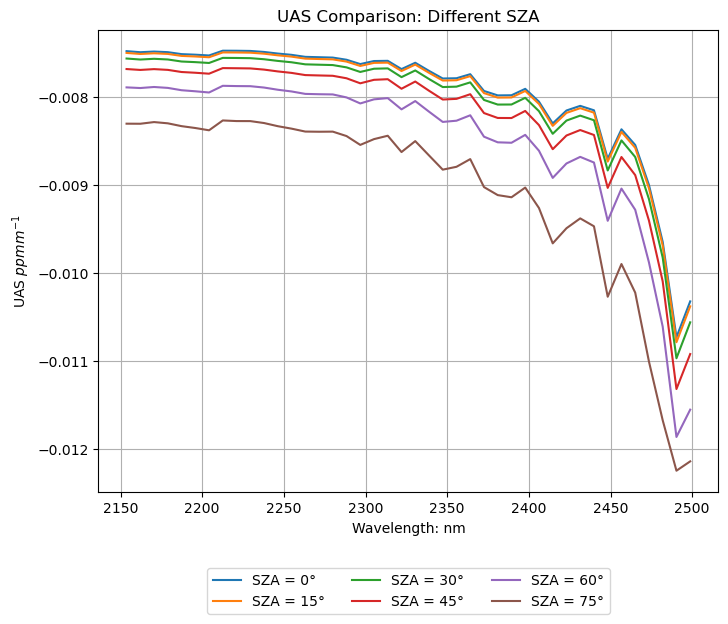

[[   0.]
 [ 500.]
 [1000.]
 [1500.]
 [2000.]
 [2500.]]
(6, 1)
[[   0.]
 [ 500.]
 [1000.]
 [1500.]
 [2000.]
 [2500.]]
(6, 1)
[[   0.]
 [ 500.]
 [1000.]
 [1500.]
 [2000.]
 [2500.]]
(6, 1)
[[   0.]
 [ 500.]
 [1000.]
 [1500.]
 [2000.]
 [2500.]]
(6, 1)
[[   0.]
 [ 500.]
 [1000.]
 [1500.]
 [2000.]
 [2500.]]
(6, 1)
[[   0.]
 [ 500.]
 [1000.]
 [1500.]
 [2000.]
 [2500.]]
(6, 1)


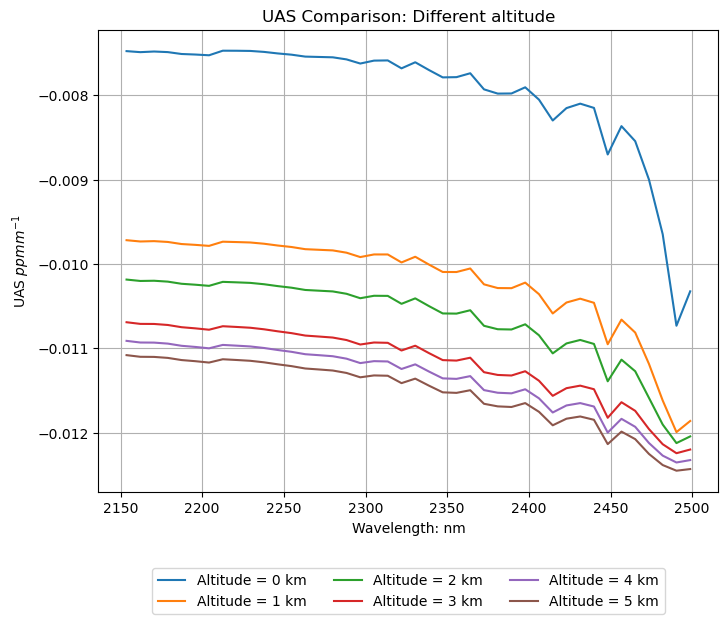

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import time

sys.path.append("C:\\Users\\RS\\VSCode\\matchedfiltermethod\\src")

from utils.satellites_data import general_functions as gf
from utils import satellites_data as sd
from utils import generate_radiance_lut_and_uas as glut
from utils import simulate_images as si
from algorithms import matched_filter_variants as mfs

wvls, general_uas = glut.generate_satellite_uas_for_specific_range_from_lut(
    "AHSI", 0, 50000, 2150, 2500, 25, 0
)

# 参数设置
start = 0
end_range = 50000
step_1 = 10000  # 图一的尾部间隔
step_2 = 10000  # 图二的固定间隔

# 图一：头部固定为 0，尾部从 5000 到 50000，间隔逐步增加
plt.figure(figsize=(8, 6))
for end in range(5000, end_range + 1, step_1):
    x, uas = glut.generate_satellite_uas_for_specific_range_from_lut(
        "AHSI", 0, end, 2150, 2500, 25, 0
    )
    plt.plot(x, uas, label=f'Range: 0-{end}')

plt.title("UAS Comparison: Different Range")
plt.xlabel("Wavelength: nm")
plt.ylabel("UAS")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)  # 图例放在底部，分成3列
plt.grid(True)

# 图二：固定间隔 10000，从 0-10000 到 40000-50000
plt.figure(figsize=(8, 6))
for start in range(0, end_range, step_2):
    end = start + step_2
    x, uas = glut.generate_satellite_uas_for_specific_range_from_lut(
        "AHSI", start, end, 2150, 2500, 25, 0
    )
    plt.plot(x, uas, label=f'Range: {start}-{end}')

plt.title("UAS Comparison: Interval Fixed at 10000")
plt.xlabel("Wavelength: nm")
plt.ylabel("UAS")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)  # 图例放在底部，分成3列
plt.grid(True)

# 显示图像
plt.show()

# 图二：固定间隔 10000，从 0-10000 到 40000-50000
szas = [0, 15, 30, 45, 60, 75]
plt.figure(figsize=(8, 6))
for sza in szas:
    x, uas = glut.generate_satellite_uas_for_specific_range_from_lut(
        "AHSI", 0, 2500, 2150, 2500, sza, 0
    )
    plt.plot(x, uas, label=f'SZA = {sza}°')

plt.title("UAS Comparison: Different SZA")
plt.xlabel("Wavelength: nm")
plt.ylabel(r"UAS $ppmm^{-1}$")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)  # 图例放在底部，分成3列
plt.grid(True)

# 显示图像
plt.show()

# 图二：固定间隔 10000，从 0-10000 到 40000-50000
altitudes = [0, 1,2,3,4,5]
plt.figure(figsize=(8, 6))
for altitude in altitudes:
    x, uas = glut.generate_satellite_uas_for_specific_range_from_lut(
        "AHSI", 0, 2500, 2150, 2500, 0, altitude
    )
    plt.plot(x, uas, label=f'Altitude = {altitude} km')

plt.title("UAS Comparison: Different altitude")
plt.xlabel("Wavelength: nm")
plt.ylabel(r"UAS $ppmm^{-1}$")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)  # 图例放在底部，分成3列
plt.grid(True)

# 显示图像
plt.show()
